<a href="https://colab.research.google.com/github/xeromark/TareasIA/blob/main/TareaIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pregunta 1

## Prerrequisitos

Para usar la librería de python de bnlearn es necesario instalarla con
el siguiente comando por la terminal:



In [ ]:
pip install bnlearn

## Método Exhaustivesearch

Exhaustivesearch determina todas las posibles estructuras de red bayesiana en un conjunto de datos para seleccionar la estructura que se adecue mejor estos. Por lo tanto, este método garantiza encontrar la estructura más óptima a costa de usar muchos recursos computacionales de la máquina en donde se utiliza.


### Funcionamiento

A continuación se explicará el funcionamiento de los métodos de la librería bnlearn en cada una de las partes del código:

1. ```bn.structure_learning.fit(df, methodtype='ex', scoretype='bic')```


bn.structure_learning.fit: Sirve para aprender la estructura de la red bayesiana. Por otra parte, dentro de sus parámetros se especifíca que se debe usar el algoritmo "methodtype='ex' " que corresponde al método Exhaustivesearch y tambien se usa "scoretype='bic' " el cual corresponde a un criterio de información bayesiano (BIC) para comparar modelos y seleccionar el que mejor se ajuste a los datos obtenidos a partir del analisis obtenido en el aprendizaje de la red. Además se le pasa por parametro del data frame (df) del csv que se quiere analizar.

2. ``` bn.independence_test(model, df, alpha=0.05, prune=True) ```


bn.independence_test: Realiza pruebas de independencia condicional entre las variables de la red bayesiana por lo que limina datos que no son significativos para la estructura final. Este umbral para decidir la significancia de un dato esta dado por el parámetro alpha=0.05 el cual se refiere a un 5% de error mientras que prune elimina estos valores no significativos.

[bnlearn] >Computing best DAG using [ex]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores for model comparison (higher is better).
[bnlearn] >Compute edge strength with [chi_square]
+----+----------+---------------+-------------+--------------+--------------+-------+
|    | source   | target        | stat_test   |      p_value |   chi_square |   dof |
+====+==========+===============+=============+==============+==============+=======+
|  0 | Aspersor | Hierba_mojada | True        | 0            |     1607.04  |     1 |
+----+----------+---------------+-------------+--------------+--------------+-------+
|  1 | Aspersor | Nublado       | True        | 1.26779e-153 |      697.115 |     1 |
+----+----------+---------------+-------------+--------------+--------------+-------+
|  2 | Lluvia   | Hierba_mojada | True        | 0            |     7118.7   |     1 |
+----+----------+---------------+-------------+--------------+--------------+-------+
|  3 | Nublado  | Ll

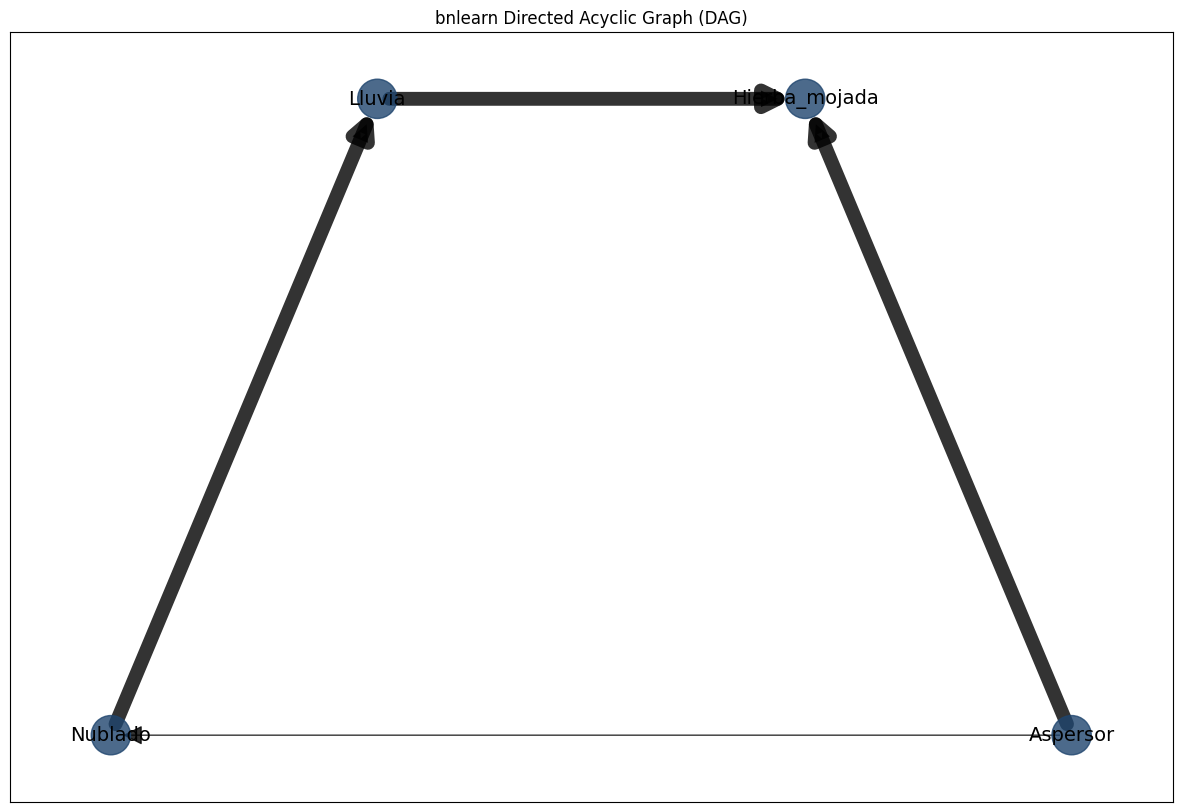

{'fig': <Figure size 1500x1000 with 1 Axes>,
 'ax': <Figure size 1500x1000 with 1 Axes>,
 'pos': {'Lluvia': array([-0.4453624,  0.7740632]),
  'Hierba_mojada': array([0.4453624, 0.7740632]),
  'Nublado': array([-1.       , -0.7740632]),
  'Aspersor': array([ 1.       , -0.7740632])},
 'G': <networkx.classes.digraph.DiGraph at 0x7b0f932e0d90>,
 'node_properties': {'Aspersor': {'node_color': '#1f456e', 'node_size': 800},
  'Hierba_mojada': {'node_color': '#1f456e', 'node_size': 800},
  'Lluvia': {'node_color': '#1f456e', 'node_size': 800},
  'Nublado': {'node_color': '#1f456e', 'node_size': 800}},
 'edge_properties': {('Lluvia', 'Hierba_mojada'): {'color': '#000000',
   'weight': 10.0},
  ('Nublado', 'Lluvia'): {'color': '#000000', 'weight': 10.0},
  ('Aspersor', 'Hierba_mojada'): {'color': '#000000', 'weight': 10.0},
  ('Aspersor', 'Nublado'): {'color': '#000000', 'weight': 1.0}}}

In [5]:
import bnlearn as bn
from tabulate import tabulate
import pandas as pd

df = pd.read_csv('dataset.csv')

model = bn.structure_learning.fit(df, methodtype='ex', scoretype='bic')

model = bn.independence_test(model, df, alpha=0.05, prune=True)

print(tabulate(model['independence_test'], tablefmt="grid", headers="keys"))
bn.plot(model) # Grafica la estructura

### Consultas de Inferencia

Obtenido estos resultados, cabe a hacerse las siguientes consultas de inferencia:

**¿Cuál es la probabilidad de que la tierra esté mojada dado que se ha llovido?**



## Método Hillclimbsearch

HillClimbSearch es un algoritmo de búsqueda heurística que intenta encontrar la mejor estructura de la red bayesiana dado un conjunto de datos. Para ello, implementa una búsqueda local que comienza desde el inicio del DAG y continúa realizando iterativamente manipulaciones de un solo borde que aumentan al máximo la puntuación con los cuales se van categorizando la mejor estructura.

In [ ]:
import bnlearn as bn
import pandas as pd
from tabulate import tabulate

df = pd.read_csv('dataset.csv')

model = bn.structure_learning.fit(df, methodtype='hc', scoretype='bic')

G = bn.plot(model)

model1 = bn.independence_test(model, df, alpha=0.05, prune=False)
bn.plot(model1, pos=G['pos'])

print(tabulate(model1['independence_test'], headers="keys"))



---

# Pregunta 2


## **a)** Suponga que se empieza escuchando una canción del gran Yngwie Malmsteen. Realizar un random-walk, a partir del punto anterior, reportando a través de gráficos de líneas, como cambian las probabilidades de escuchar una canción de algunos de los grupos mencionados anteriormente. Dicho random-walk debe ser generado hasta llegar a una convergencia definida por usted, a través de un parámetro de usuario epsilon. Analizar los resultados obtenidos.

A continuación se muestra un código de Python que permite ver el cambio de las probabilidades de escuchar cierta canción. Además, se ha seleccionado un epsilon de 10 debido a que converge a un punto en donde su valor no varía demaciado (Solo varía en cifras no significativas). Por lo tanto, se analizarán los grupos G1, G3, G5, G7 y G9.

In [ ]:
import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as plt

# matriz de Transición de cada distribución de probabilidad
Matriz_T = np.array([
   #  G1    G2    G3    G4    G5    G6    G7    G8    G9
    [0.25, 0.06, 0.08, 0.15, 0.04, 0.02, 0.15, 0.15, 0.10],  # G1
    [0.15, 0.15, 0.10, 0.22, 0.01, 0.02, 0.15, 0.10, 0.10],  # G2
    [0.12, 0.00, 0.05, 0.24, 0.14, 0.04, 0.27, 0.07, 0.07],  # G3
    [0.05, 0.13, 0.05, 0.30, 0.10, 0.10, 0.22, 0.05, 0.00],  # G4
    [0.18, 0.20, 0.07, 0.20, 0.15, 0.05, 0.05, 0.05, 0.05],  # G5
    [0.20, 0.10, 0.20, 0.05, 0.05, 0.10, 0.02, 0.15, 0.13],  # G6
    [0.01, 0.05, 0.15, 0.14, 0.17, 0.10, 0.12, 0.10, 0.16],  # G7
    [0.17, 0.15, 0.07, 0.07, 0.15, 0.10, 0.12, 0.09, 0.08],  # G8
    [0.13, 0.11, 0.13, 0.03, 0.20, 0.20, 0.04, 0.15, 0.01]   # G9
])

### Declaracion de variables
estadoActual = [0, 0, 0, 0, 1, 0, 0, 0, 0]
temporal = [] #lista vacia para guardar los datos.
fs = [0,3,4,6,8] # Filas Seleccionadas para mostrar, en este caso G1, G3. G5, G7, G9
Epsilon = 10 # Parámetro Epsilon solicitado, solo serán 10 iteraciones porque con un mayor valor varía poco

### Lógica del random-walk
for i in range(Epsilon):
   estadoActual = np.dot(estadoActual , Matriz_T) # Acumula el estado actual con el siguiente
   temporal.append(estadoActual) # Con cada iteracion se alamcena su resultado acumulado

temporal = np.array(temporal) # Lo pasamos a una lista de array de tipo enteros no tuplas

# Se muestran y grafican los resultados obtenidos
for i in fs:
  plt.plot(temporal[: , i], label=f'Canción G{i+1}')

# Mostrar la tabla tabulada asociada al grafico
print(tabulate(temporal[:, fs], headers=["G1","G4","G5","G7","G9"], tablefmt="grid"))

plt.xlabel('Iteración')
plt.ylabel('Probabilidad (%)')
plt.title('Probabilidad de reproducción de música')
plt.legend()
plt.grid(True)
plt.show()

Tal y como se puede ver al compilar el código de python, los grupos convergen a los siguientes valores:

* G1 = 0.131626
* G4 = 0.171091
* G5 = 0.110066
* G7 = 0.136879
* G9 = 0.0762878



Estos resultados nos indican cual de ellos es más probable de ser escuchado a largo plazo. En este caso podemos ver que quien tiene el valor más alto **dentro del grupo escogido** lo tiene G4 que corresponde a *Rhapsody of fire* con una probabilidad de 0.171091.

Por lo tanto, una persona que deje la Playlist sonando por un tiempo determinado lo más probable es que se escuchen canciones provenientes de *Rhapsody of fire*.

---

## **b)** Determinar la distribución estacionaria de la cadena de Markov, usando para ello un método analítico. Compare y analice con los resultados obtenidos en el punto **(a)**

Para calcular la distribución estacionaria de la cadena de Markov de forma analítica se debe recordar lo siguiente visto en clases:

1.   πT = π
2.   π1 + π2 + π3 + ... + πn = 1  ;  n ∈ ℤ




El punto **(1)** sugiere que la probabilidad de estar en un estado estacionario π no cambiará por más que se le aplique la matriz de transición.

El punto **(2)** se refiere que la sumatoria de las probabilidades πn en el estado estacionario es igual a 1

---

* Por lo tanto, se sabe que:

![Descripción de la imagen](https://drive.google.com/uc?id=1BuK7EpKO1e-cYfnwdmlK1w0zyji0WrKi)


Luego se tiene que πT = π y la matriz se lleva a un sistema de ecuaciones:


![Descripción de la imagen](https://drive.google.com/uc?id=1cmKVuV28IvIzGFpu1jztseBPVSj104PD)


Recordando la restricción del punto **(2)**, todas las **Gn** deben sumar 1 en total quedando finalmente como la siguiente figura:

![Descripción de la imagen](https://drive.google.com/uc?id=1-fTDJ-_geeCeX5YXX6_gg7iYJlfrZZge)


Al resolver este sistema de ecuación lineal se obtienen los siguientes valores:

* G1 = 0.13162585
* G2 = 0.10540776
* G3 = 0.09476106
* G4 = 0.17109049
* G5 = 0.11006619
* G6 = 0.07747712
* G7 = 0.13687884
* G8 = 0.09640483
* G9 = 0.07628785


Ahora se hará una tabla comparativa en donde se podrán a preciar los valores calculados a partir de iteraciones y al calcular de forma analítica de la distribución estacionaria de la cadena de Markov:

<table>
  <tr>
    <th>Grupo</th>
    <th>Random-Walk</th>
    <th>Distribución estacionaria</th>
    <td>Precisión %</td>

  </tr>
  <tr>
    <td>G1</td>
    <td>0,131626</td>
    <td>0,13162585</td>
    <td>≈ 1,13 * 10^-4 % </td>

  </tr>
  <tr>
    <td>G4</td>
    <td>0,171091 </td>
    <td>0,17109049</td>
    <td>≈ 2,98 * 10^-4 % </td>

  </tr>
  <tr>
    <td>G5</td>
    <td>0,110066</td>
    <td>0,11006619</td>
    <td>≈ 1,72 * 10^-4 % </td>

  </tr>
  <tr>
    <td>G7</td>
    <td>0,136879</td>
    <td>0,13687884</td>
    <td>≈ 1,16 * 10^-4 % </td>

  </tr>
    <tr>
    <td>G9</td>
    <td>0,0762878</td>
    <td>0,07628785</td>
    <td>≈ 6,55 * 10^-5 % </td>

  </tr>
</table>

Como se puede apreciar en la tabla, los valores de las probabilidades de cada grupo calculados a partir de 10 iteraciones se aproximan demaciado a los calculados de forma analítica. Cabe a mencionar que el error porcentual (%) en todos los casos vistos en la tabla, no superan el 0,01%, por lo que se concluye que a partir de las 10 iteraciones solo son afectadas las cífras menos significativas.


---

# Pregunta 3

## A partir del ejemplo de HMM visto en clases, determine la probabilidad del estado oculto q5 más probable a partir de la siguiente secuencia de observaciones: o1:Satisfecho, o2:Insatisfecho, o3:Insatisfecho, o4:Satisfecho, o5:Insatisfecho,o6:Insatisfecho, o7:Insatisfecho, o8:Insatisfecho, o9:Satisfecho.


Se tienen dos matrices, la de transición (T) y la matriz de emisión (E) se tiene (S,I) que corresponden a satisfecho e insatisfecho.

![Descripción de la imagen](https://drive.google.com/uc?id=1rqqGfksjnnl3YWg1-Ewn3PylI8YDfkKL)

En el caso de los la probabilidad de estados (π), se va a suponer que es igual para cada uno, es decir (1/3, 1/3, 1/3) para los estados **Ramen**, **Salmorejo** y **Cebolla** respectivamente. Además, se tiene la matriz de observaciones (O) [0, 1, 1, 0, 1, 1, 1, 1, 0] donde '0' es satisfecho y '1' corresponde a insatisfecho.

Como se pide la probabilidad del estado oculto más probable en q5, se debe usar Viterbi para obtenerlo, por lo tanto a continuación se tiene el algoritmo que se debe seguir:

![Descripción de la imagen](https://drive.google.com/uc?id=13aQunno6E_EEb59KWOUx1FDRuZ2EDgL_)

Luego al terminar, para saber cual es el estado oculto más probable se debe extraer el argumento de la matriz que tenga mayor valor en q5.

Entonces, para determinar cual es el estado más probable en q5 se hace uso del siguiente código de python que sigue el mismo algoritmo ya explicado:




In [ ]:
import numpy as np
from tabulate import tabulate

def viterbi(O, T, E, π):

    # O: Secuencia de observaciones.
    # A: Matriz de probabilidad de transición.
    # B: Matriz de probabilidad de emisión.
    # π: Vector de probabilidad iniciales que para este caso todas son iguales.

    n_estados = T.shape[0]  # Numero de estados
    n_obs = len(O)          # Numero de observaciones

    # 1. Inicialización
    #               9   x    3
    V = np.zeros((n_obs, n_estados))

    for s in range(n_estados):
        V[0, s] = π[s] * E[s, O[0]]

    # 2. Recursión
    for t in range(1, n_obs):
        for s in range(n_estados):
            prob = V[t-1] * T[:, s] * E[s, O[t]]
            V[t, s] = np.max(prob)

    return V

# Datos de matrices de transición y emisión
# R: Ramen
# S: Salmorejo
# C: Cebolla

Matriz_T = np.array([
    # R    S    C
    [0.2, 0.6, 0.2], # R
    [0.3, 0.0, 0.7], # S
    [0.5, 0.0, 0.5]  # C
])

Matriz_E = np.array([
    # S    I
    [0.8, 0.2],
    [0.3, 0.7],
    [0.6, 0.4]
])

# Probabilidades iniciales
S = ['Ramen', 'Salmorejo', 'Cebolla']
π = np.array([1/3, 1/3, 1/3])  # Suponiendo una % igual para cada estado

# Secuencia de observaciones (1 = satisfecho, 0 = insatisfecho)
observaciones = [0, 1, 1, 0, 1, 1, 1, 1, 0]

# se usa algoritmo Viterbi
V = viterbi(observaciones, Matriz_T, Matriz_E, π)

# Obtener la probabilidad en q5
q5 = np.max(V[4])

print("Probabilidad del estado oculto q5 más probable es", S[np.argmax(V[4])] , "con una probabilidad de", q5)


Al ejecutar el código, se obtiene como resultado que el estado oculto más probable en q5 es el Salmorejo con una probabilidad de 0.00526847. Este resultado representa el estado oculto donde es más probable que uno se encuentre después de haber observado la secuencia hasta la quinta observación.